# MLOps Bootcamp - Checkpoint 1 - Sergio Acuña

## Tasks:

- Download a dataset for any public repository
- Load the dataset into Jupyter Notebook
- Understand the dimensions of your data
- Identify the data types available in the dataset
- Get an idea of the missing values, duplicate entries and outliers in the data
- Look into descriptive statistics of your data
- Get an overview of the distribution of those variables, which are quantitative continuos
- Start Looking for better ways to show qualitative data in your dataset
- Play around with the correlation available between the features

## Load libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib
%matplotlib inline

### Download a dataset for any public repository

In this case I am using "Vending Machine Sales" from Kaggle (https://www.kaggle.com/datasets/awesomeasingh/vending-machine-sales)

### Load the dataset into Jupyter Notebook  

In [75]:
vmsales = pd.read_csv("vending_machine_sales.csv", low_memory=False)
vmsales.sample(4)

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
5555,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,KitKat - Crisp Wafers,Food,15477901246,"Thursday, August 4, 2022",Credit,138,2.50,1,138,2.50,1,2.50,5.00,8/4/2022
1650,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Vitamin Water - Squeezed Lemonade,Water,14914204411,"Saturday, April 2, 2022",Cash,147,2.75,1,147,2.75,1,2.75,2.75,4/2/2022
5018,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Poland Springs Water,Water,15407156000,"Tuesday, July 19, 2022",Credit,144,1.50,1,144,1.50,1,1.50,1.50,7/22/2022
1816,Processed,VJ300320686,Earle Asphalt,Earle Asphalt x1371,Wonderful Pistachios - Variety,Food,14943181187,"Friday, April 8, 2022",Credit,138,2.00,1,138,2.00,1,2.00,3.25,4/8/2022


### Understand the dimensions of the data

This will be done using seaborn's shape method

In [76]:
print(f'Rows: {vmsales.shape[0]}')
print(f'Columns: {vmsales.shape[1]}')

Rows: 6445
Columns: 18


### Identify the data types avaliable

For this, the info method will be used

In [77]:
vmsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6445 non-null   object 
 1   Device ID    6445 non-null   object 
 2   Location     6445 non-null   object 
 3   Machine      6445 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6260 non-null   object 
 6   Transaction  6445 non-null   int64  
 7   TransDate    6445 non-null   object 
 8   Type         6445 non-null   object 
 9   RCoil        6445 non-null   int64  
 10  RPrice       6445 non-null   float64
 11  RQty         6445 non-null   int64  
 12  MCoil        6445 non-null   int64  
 13  MPrice       6444 non-null   float64
 14  MQty         6445 non-null   int64  
 15  LineTotal    6445 non-null   float64
 16  TransTotal   6445 non-null   float64
 17  Prcd Date    6445 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

Further investigating the object types:

In [78]:
vmsales.describe(include='object')

,Status,Device ID,Location,Machine,Product,Category,TransDate,Type,Prcd Date
count,6445,6445,6445,6445,6441,6260,6445,6445,6445
unique,2,5,4,5,170,4,242,2,241
top,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Food,"Thursday, July 14, 2022",Cash,3/30/2022
freq,6444,2568,2568,2568,517,3428,68,4297,123


For vending machines, the "Coil" is a device that helps helding in place the products, so most probably the RCoil and MCoil int64 columns are not necessarily numerical:

In [79]:
print(f'RCoil distinct values: {vmsales.RCoil.unique()}')
print(f'MCoil distinct values: {vmsales.MCoil.unique()}')

RCoil distinct values: [148 123 146 114 110 144 134 143 111 131 136 132 140 130 137 147 122 138
 124 133 112 145 120 142 121 125 113 141 135 139 153 157 154 151 158 152
 155 150 162 161 160 156 165 164 163]
MCoil distinct values: [148 123 146 114 110 144 134 143 111 131 136 132 140 130 137 147 122 138
 124 133 112 145 120 142 121 125 113 141 135 139 153 157 154 151 158 152
 155 150 162 161 160 156 165 164 163]


So then, Status, Location, DeviceID, Machine, Product, RCoil, MCoil, Category & Type seems to be Categorical Data
Transaction will be set to string as it is not a field that we want to run any analisis for now
TransDate and Prcd Date will be set to date

In [80]:
vmsales["Status"] = vmsales["Status"].astype("category")
vmsales["Location"] = vmsales["Location"].astype("category")
vmsales["Machine"] = vmsales["Machine"].astype("category")
vmsales["Product"] = vmsales["Product"].astype("category")
vmsales["Category"] = vmsales["Category"].astype("category")
vmsales["Type"] = vmsales["Type"].astype("category")
vmsales["Device ID"] = vmsales["Device ID"].astype("category")
vmsales["RCoil"] = vmsales["RCoil"].astype("category")
vmsales["MCoil"] = vmsales["MCoil"].astype("category")
vmsales["Transaction"] = vmsales["Transaction"].astype("string")
vmsales["TransDate"] = pd.to_datetime(vmsales["TransDate"])
vmsales["Prcd Date"] = pd.to_datetime(vmsales["Prcd Date"])

vmsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Status       6445 non-null   category      
 1   Device ID    6445 non-null   category      
 2   Location     6445 non-null   category      
 3   Machine      6445 non-null   category      
 4   Product      6441 non-null   category      
 5   Category     6260 non-null   category      
 6   Transaction  6445 non-null   string        
 7   TransDate    6445 non-null   datetime64[ns]
 8   Type         6445 non-null   category      
 9   RCoil        6445 non-null   category      
 10  RPrice       6445 non-null   float64       
 11  RQty         6445 non-null   int64         
 12  MCoil        6445 non-null   category      
 13  MPrice       6444 non-null   float64       
 14  MQty         6445 non-null   int64         
 15  LineTotal    6445 non-null   float64       
 16  TransT

### Get an idea of the missing values, duplicate entries and outliers in the data

Missing values by column:

In [81]:
vmsales.isna().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          4
Category       185
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           1
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

And a graphic representation of the missing values:


Preview of data with null values:
xxxxxxxxxxxxx
         Status    Device ID           Location                  Machine  \
1232  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
1431  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
1439  Processed  VJ300320692  EB Public Library  EB Public Library x1380   

     Product Category  Transaction  TransDate    Type RCoil  RPrice  RQty  \
1232     NaN      NaN  14835073327 2022-03-16  Credit   120     2.0     1   
1431     NaN      NaN  14873793590 2022-03-24    Cash   120     2.0     1   
1439     NaN      NaN  14878665903 2022-03-25  Credit   120     2.0     1   

     MCoil  MPrice  MQty  LineTotal  TransTotal  Prcd Date  
1232   120     2.0     1        2.0        2.00 2022-03-30  
1431   120     2.0     1        2.0        2.00 2022-03-30  
1439   120     2.0     1        2.0        3.25 2022-03-30  


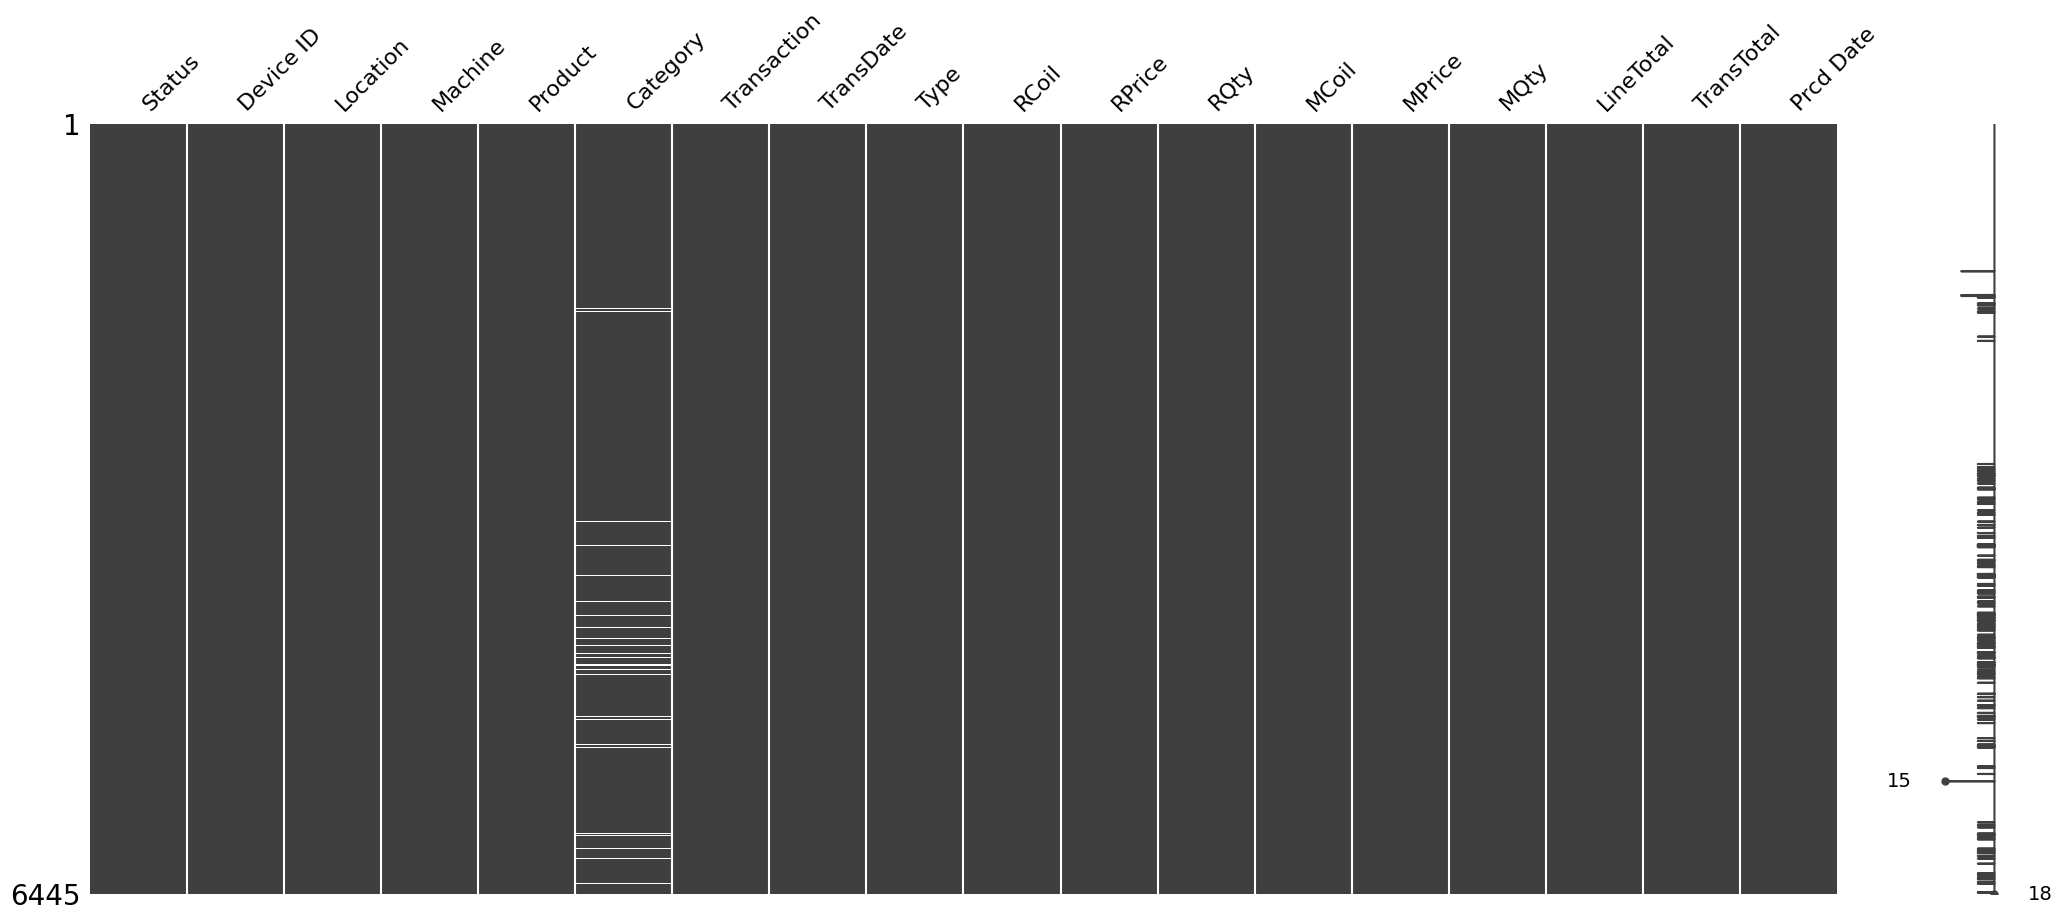

In [82]:
if vmsales.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(vmsales[vmsales.isnull().any(axis=1)].head(3))
    msno.matrix(vmsales)
    plt.show()

Now, for duplicate entries:

In [83]:
# generate count statistics of duplicate entries
if len(vmsales[vmsales.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(vmsales[vmsales.duplicated()]))
    print(vmsales[vmsales.duplicated(keep=False)].sort_values(by=list(vmsales.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


And, for the outliers, will use box charts

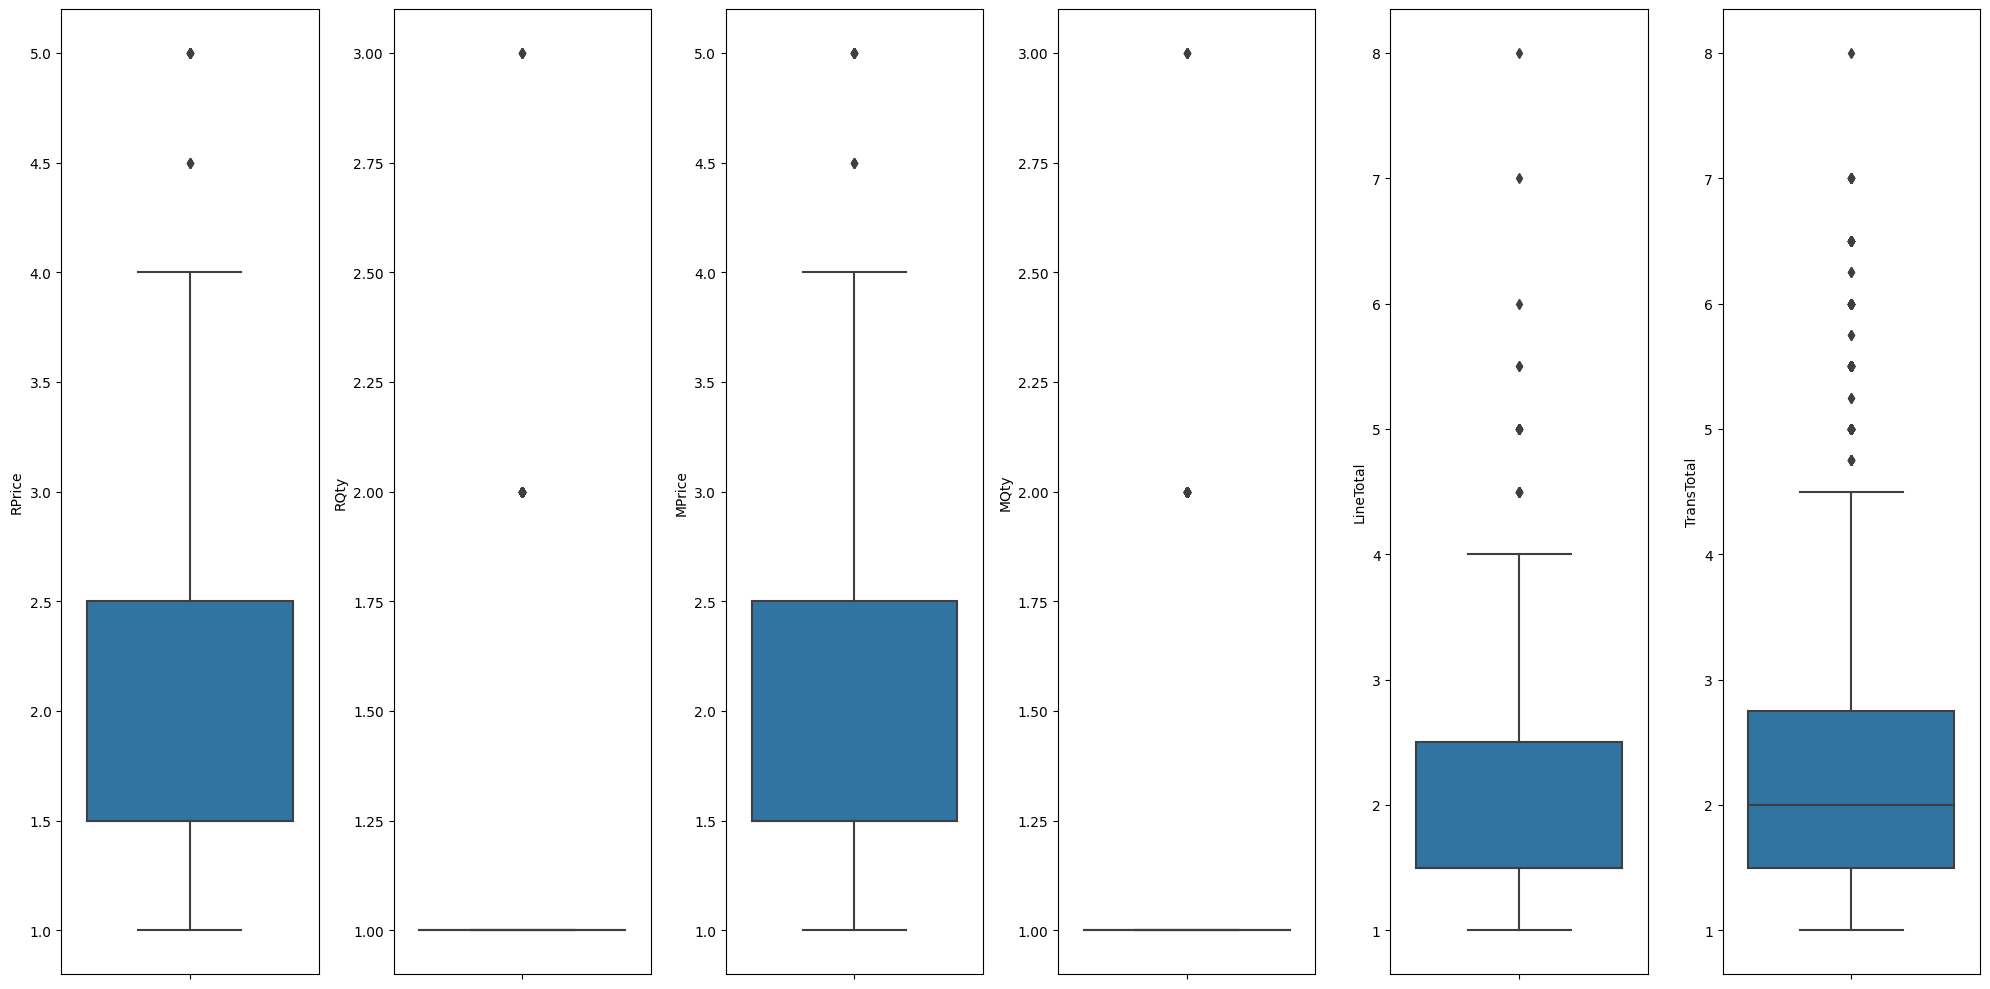

In [84]:
columns = vmsales.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=vmsales)
figure.tight_layout()
plt.show()


Seems to have some outliers on our data

### Look into descriptive statistics of your data

For this, the describe method will suffice

In [85]:
vmsales.describe().T

,count,mean,std,min,25%,50%,75%,max
RPrice,6445.0,1.926804,0.673113,1.0,1.5,1.5,2.50,5.0
RQty,6445.0,1.013344,0.121324,1.0,1.0,1.0,1.00,3.0
MPrice,6444.0,1.926870,0.673145,1.0,1.5,1.5,2.50,5.0
MQty,6445.0,1.013344,0.121324,1.0,1.0,1.0,1.00,3.0
LineTotal,6445.0,1.949651,0.703080,1.0,1.5,1.5,2.50,8.0
TransTotal,6445.0,2.183204,1.044052,1.0,1.5,2.0,2.75,8.0


Even though there are some outliners, they are more related to the quantity*price of the "transaction"

### Get an overview of the distribution of those variables, which are quantitative continuos

Plotting the quantitative columns by different Categories

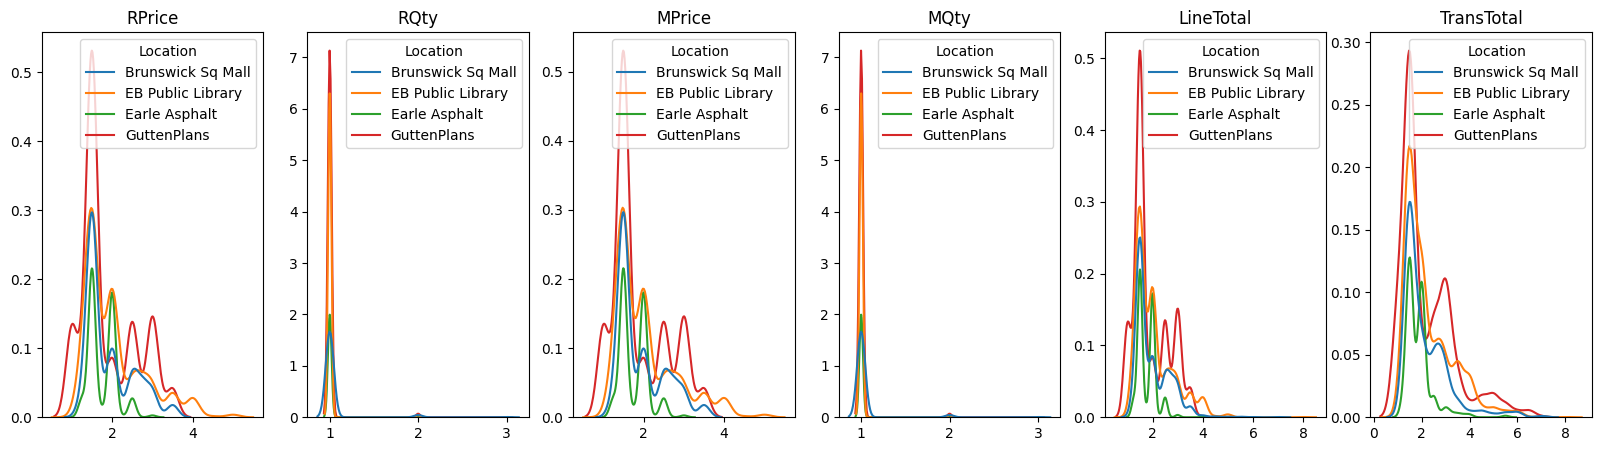

In [86]:
figure, axes = plt.subplots(
    1,
    len(columns),
    sharex=False,
    figsize=(20, 5),
)

for index, column in enumerate(columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=vmsales,
        x=column,
        hue="Location"
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")

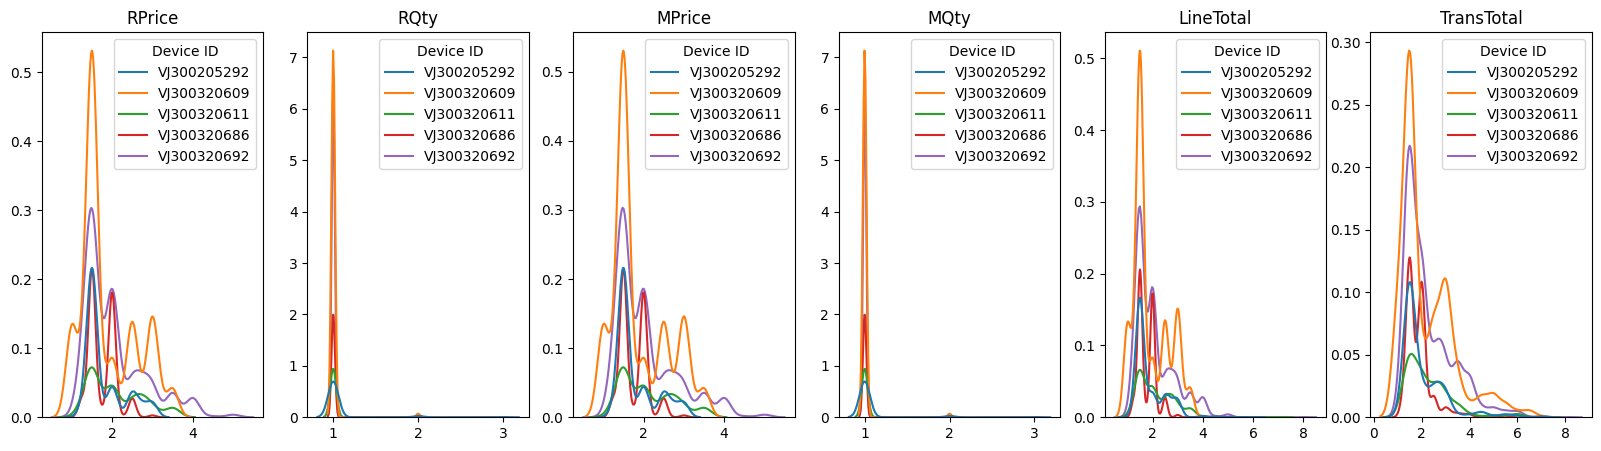

In [87]:
figure, axes = plt.subplots(
    1,
    len(columns),
    sharex=False,
    figsize=(20, 5),
)

for index, column in enumerate(columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=vmsales,
        x=column,
        hue="Device ID"
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")

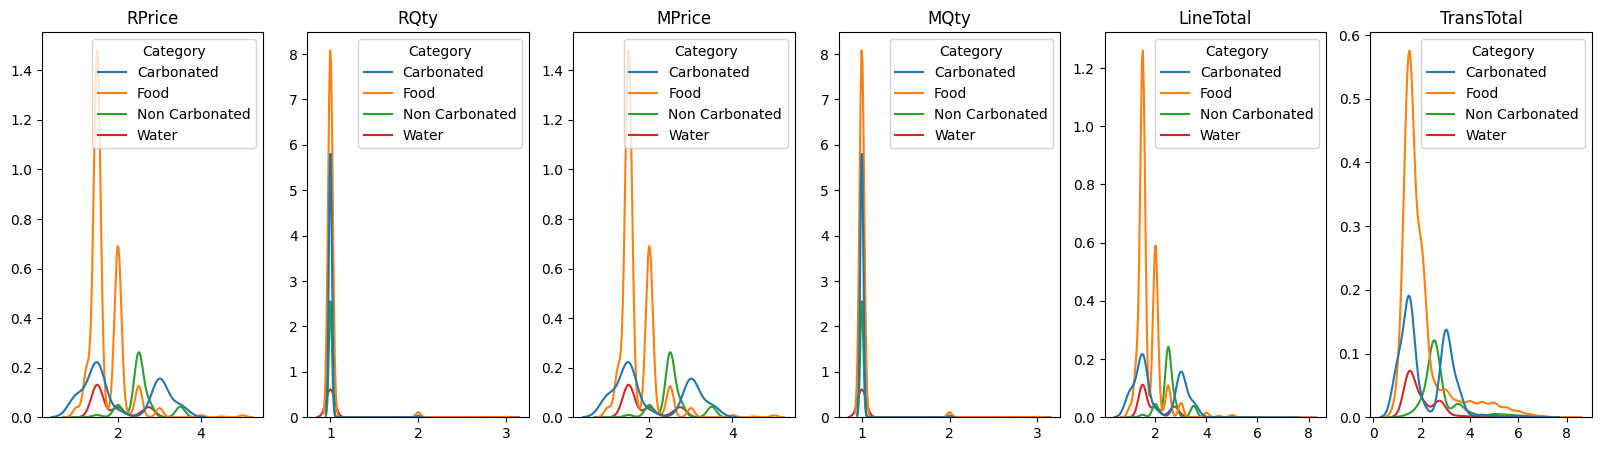

In [91]:
figure, axes = plt.subplots(
    1,
    len(columns),
    sharex=False,
    figsize=(20, 5),
)

for index, column in enumerate(columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=vmsales,
        x=column,
        hue="Category"
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")

/Users/sergio.acuna/.local/share/virtualenvs/DataScience-DR4Rm5ph/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sergio.acuna/.local/share/virtualenvs/DataScience-DR4Rm5ph/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


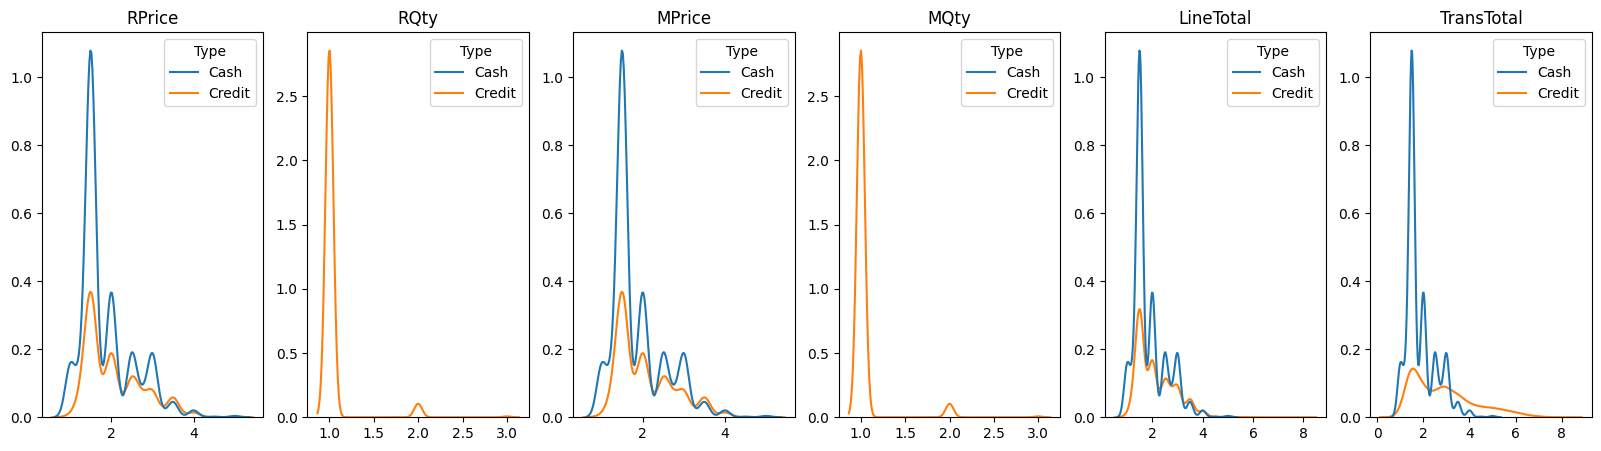

In [92]:
figure, axes = plt.subplots(
    1,
    len(columns),
    sharex=False,
    figsize=(20, 5),
)

for index, column in enumerate(columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=vmsales,
        x=column,
        hue="Type"
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")

Probably not a good dataset as the data is not following a normal distribution :(

### Start Looking for better ways to show qualitative data in your dataset

Showing the qualitative data as pie charts for those with 4 or less unique values, and barcharts for those with more than 4 unique values

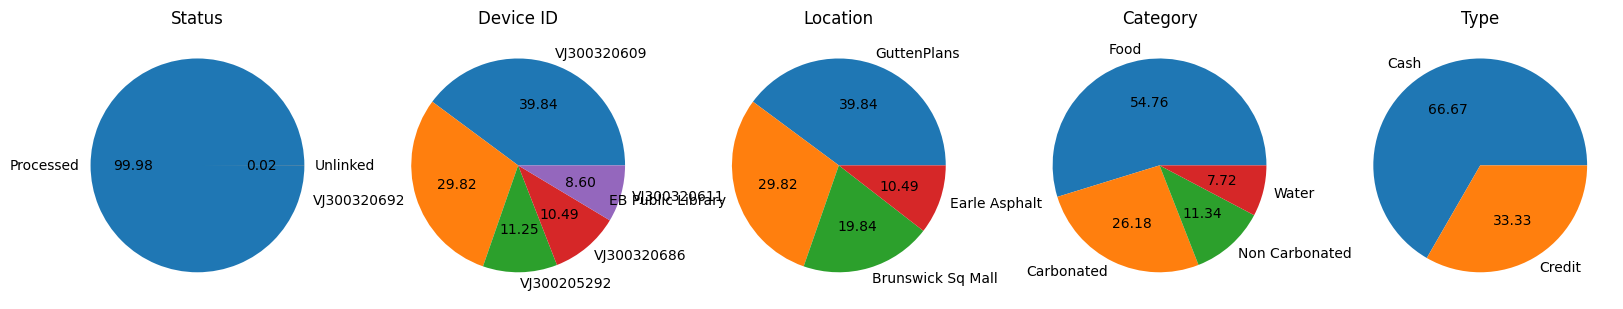

In [101]:
pie_columns = ["Status","Device ID","Location","Category","Type"]

figure, axes = plt.subplots(
    1,
    len(pie_columns),
    sharex=False,
    figsize=(20, 5),
)
for index, column in enumerate(pie_columns):  # type: ignore
    axes[index].set_title(column)
    vmsales[column].value_counts().plot(
        ax=axes[index],
        kind="pie",
        autopct="%0.2f",
    )
    axes[index].set_ylabel("")
    


For the Product Category, I selected an horizontal bar chart due to the high amount of values for this category. Also, added the Type of payment as a second category.

<AxesSubplot:xlabel='count', ylabel='Product'>

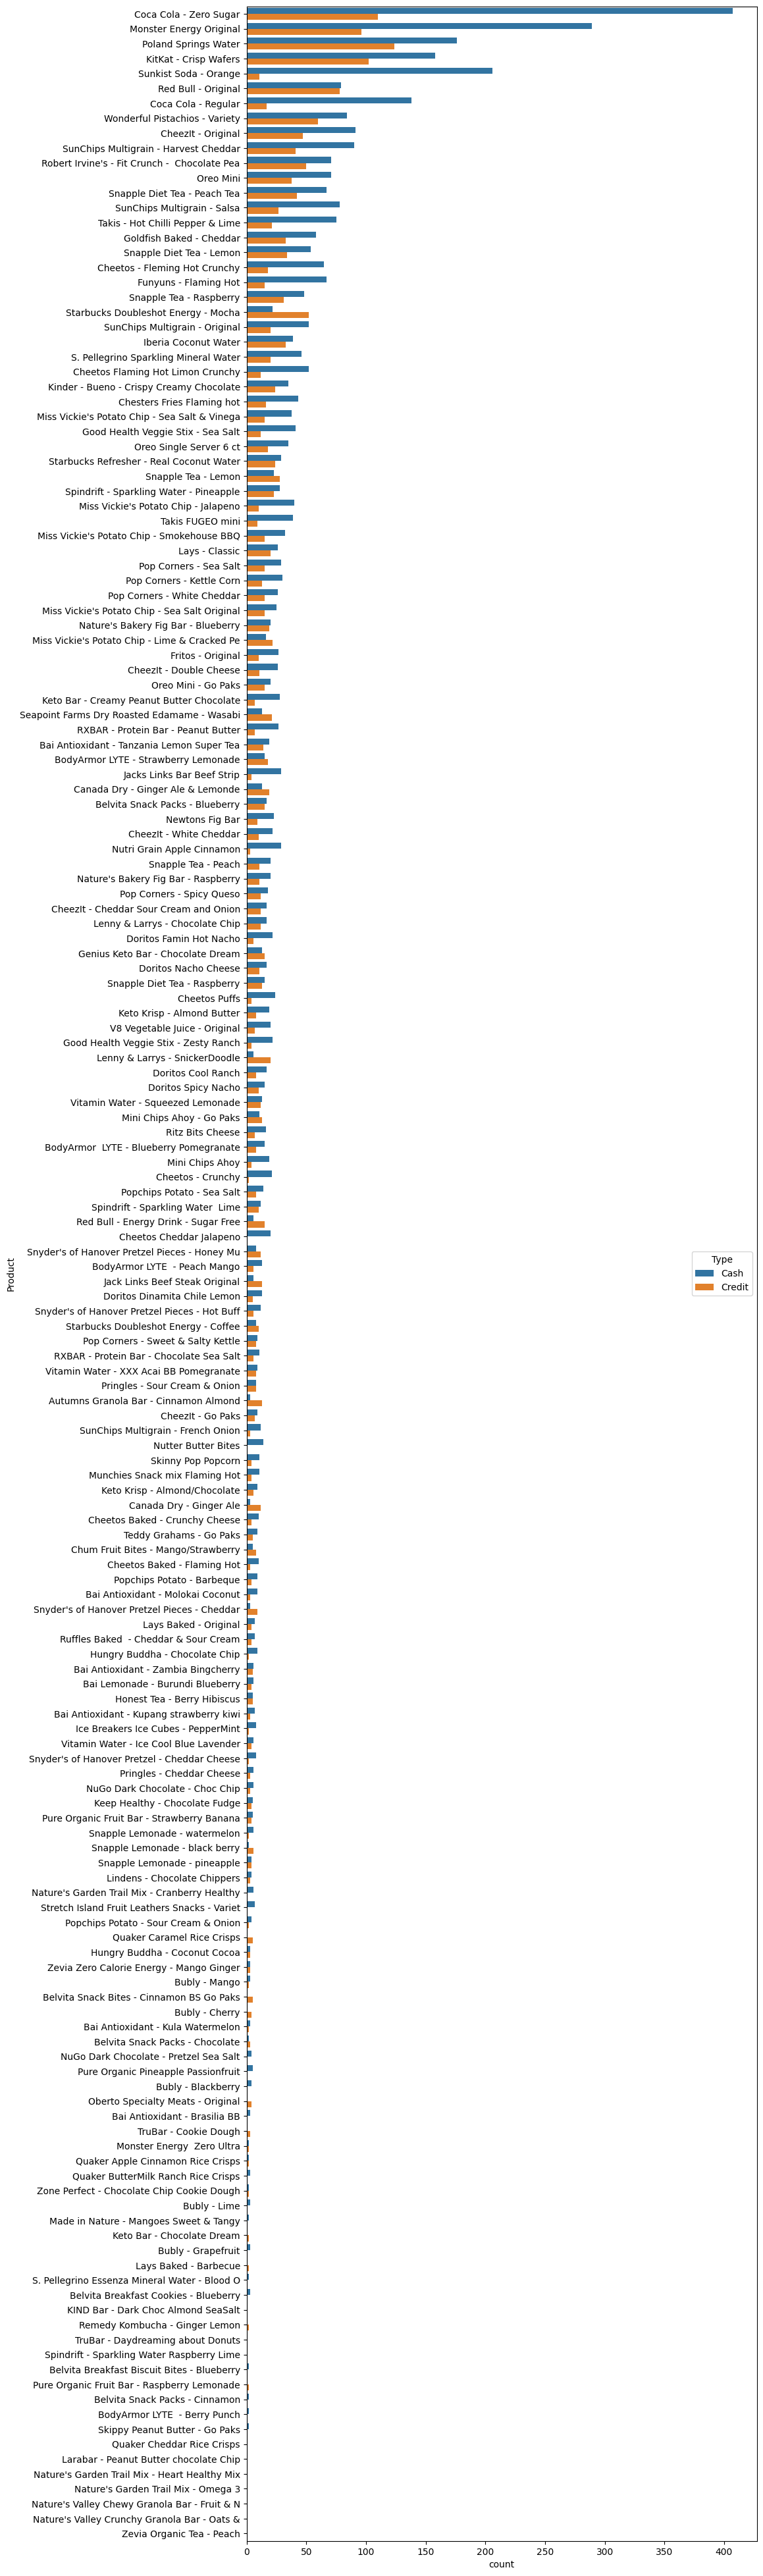

In [120]:
figure, axes = plt.subplots(
    1,
    1,
    sharex=False,
    figsize=(10, 50),
)
sns.countplot(data=vmsales, y='Product', order=vmsales.Product.value_counts().index, hue="Type")

### Play around with the correlation available between the features

Using pairplots for this

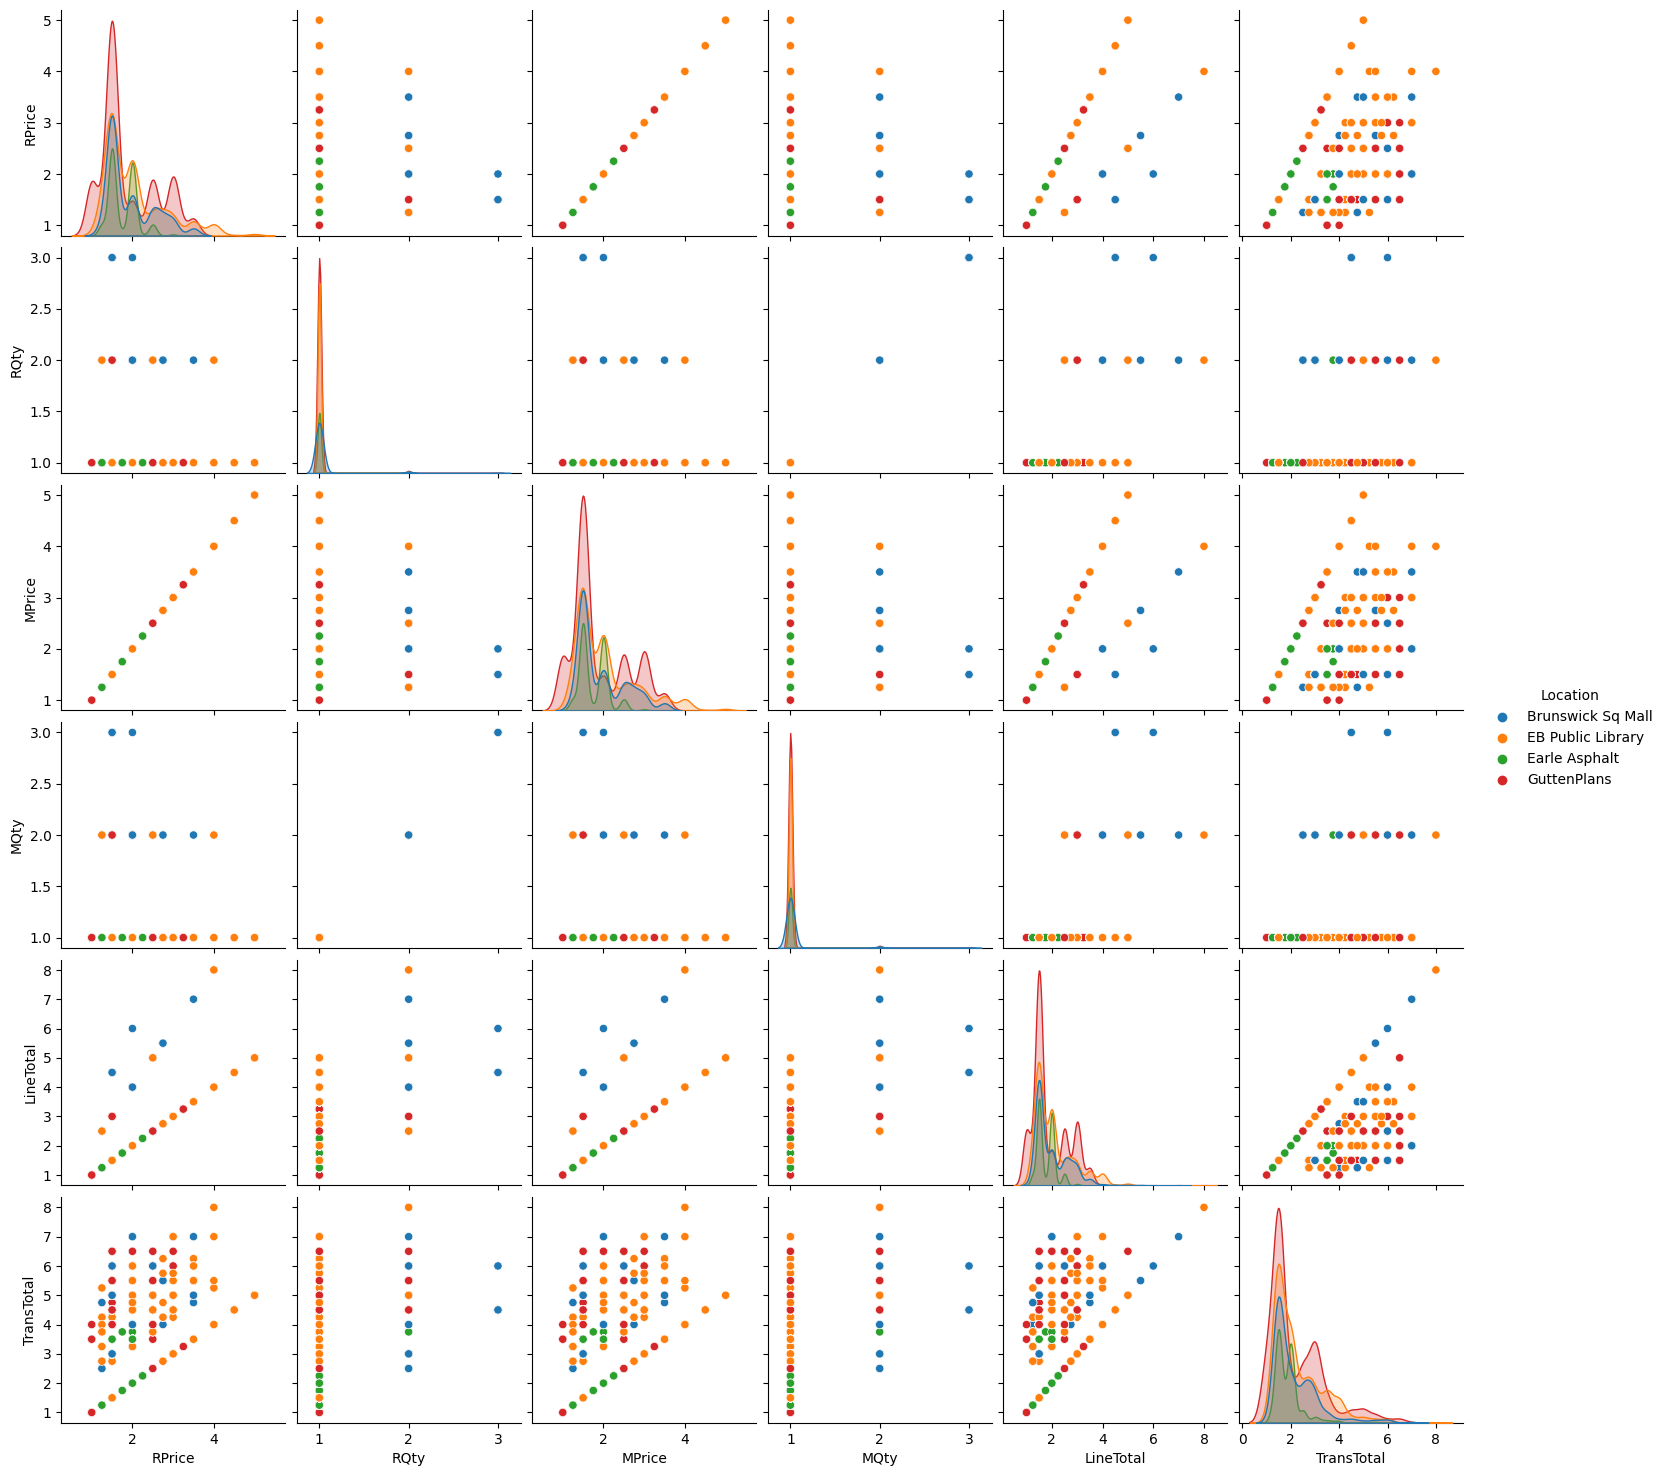

In [122]:
sns.pairplot(data=vmsales, hue="Location")

For the correlation calculation:

In [123]:
correlation = vmsales.corr()
display(correlation)

,RPrice,RQty,MPrice,MQty,LineTotal,TransTotal
RPrice,1.000000,-0.035069,1.000000,-0.035069,0.952939,0.620993
RQty,-0.035069,1.000000,-0.035081,1.000000,0.259844,0.232765
MPrice,1.000000,-0.035081,1.000000,-0.035081,0.952936,0.620968
MQty,-0.035069,1.000000,-0.035081,1.000000,0.259844,0.232765
LineTotal,0.952939,0.259844,0.952936,0.259844,1.000000,0.669116
TransTotal,0.620993,0.232765,0.620968,0.232765,0.669116,1.000000


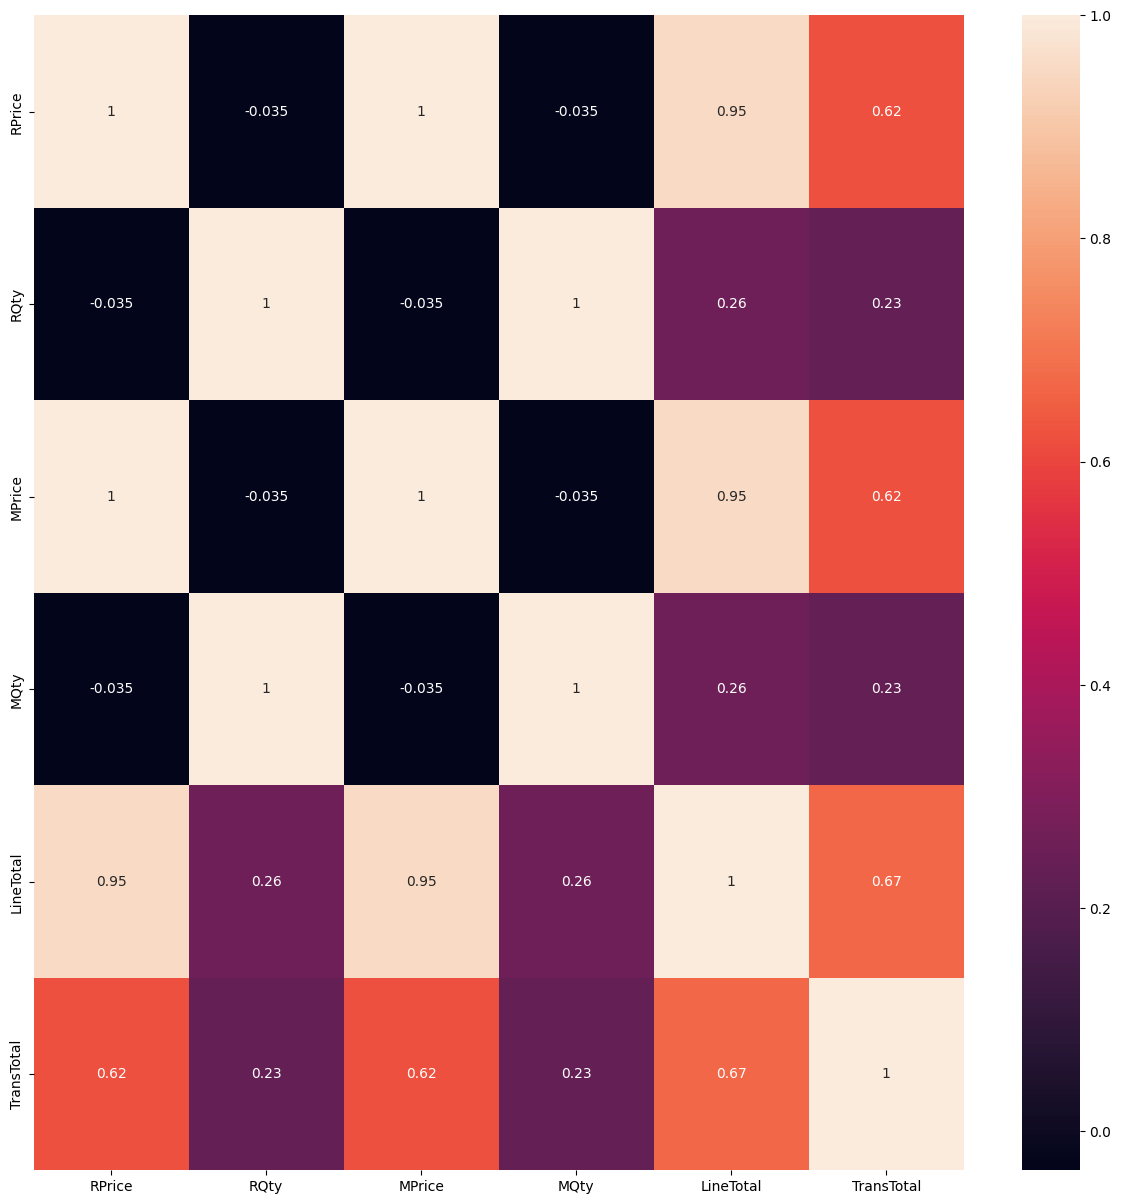

In [126]:

plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True);
